# Lecture : Graph Clustering

## Lab 04 : NCut -- Solution

### Xavier Bresson, Jiaming Wang


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5284_2025_codes/codes/03_Graph_Clustering'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    

In [2]:
# Load libraries
import numpy as np
import scipy.io
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import time
import sys
sys.path.insert(0, 'lib/')
from lib.utils import construct_kernel
from lib.utils import compute_kernel_kmeans_EM
from lib.utils import compute_kernel_kmeans_spectral
from lib.utils import compute_purity
from lib.utils import construct_knn_graph
from lib.utils import compute_ncut
from lib.utils import compute_pcut
from lib.utils import graph_laplacian
import warnings; warnings.filterwarnings("ignore")


(n,d,nc: 4000 4 4


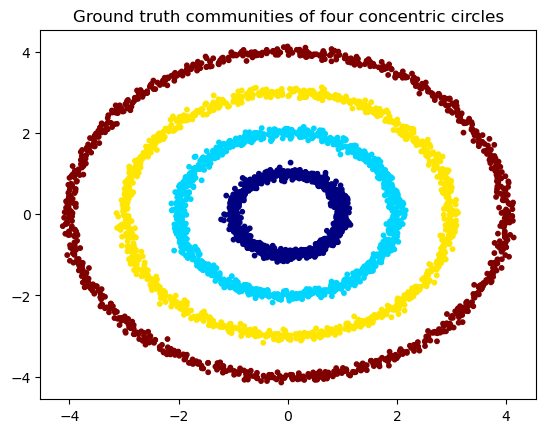

In [3]:
# Load four-circle dataset
mat = scipy.io.loadmat('datasets/four_circles.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print('(n,d,nc:',n,d,nc)

plt.figure(1)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('Ground truth communities of four concentric circles')
plt.show()


Construct Linear Kernel


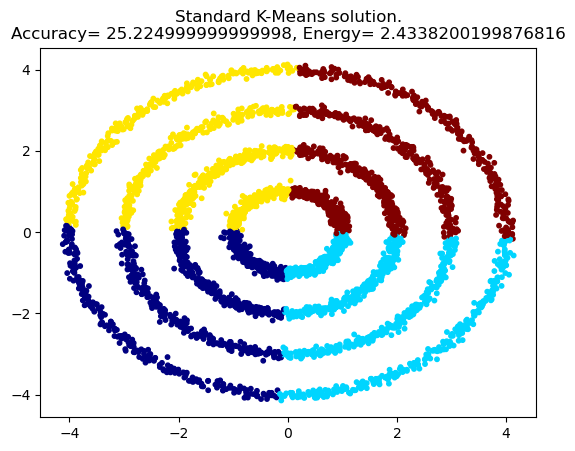

In [4]:
# Run standard/linear k-means with EM approach
Theta = np.ones(n) # Same weight for each data
# Compute linear Kernel for standard K-Means
Ker = construct_kernel(X, 'linear')
# Standard K-Means
C_kmeans, En_kmeans = compute_kernel_kmeans_EM(nc, Ker, Theta, 10)
# Plot
plt.figure(2)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_kmeans)
plt.title('Standard K-Means solution.\nAccuracy= ' + str(compute_purity(C_kmeans,Cgt,nc)) +
         ', Energy= ' + str(En_kmeans))
plt.show()


Construct kNN Gaussian Kernel
Construct Linear Kernel


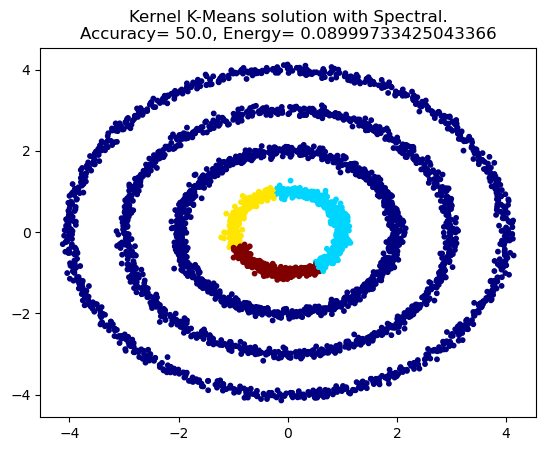

In [5]:
# Run kernel/non-linear k-means with spectral approach
Ker = construct_kernel(X, 'kNN_gaussian', 100)
# Kernel K-Means with Spectral approach
C_kmeans, En_kmeans = compute_kernel_kmeans_spectral(nc, Ker, Theta)
# Plot
plt.figure(3)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_kmeans, color=pyplot.jet())
plt.title('Kernel K-Means solution with Spectral.\nAccuracy= ' + 
          str(compute_purity(C_kmeans,Cgt,nc)) + ', Energy= ' + str(En_kmeans))
plt.show()


### Question 1: Apply the spectral NCut technique with different k values on the k-NN Graph

Experiment with the following values of k: {5, 10, 20, 40, 80}.

Observe and explain what happens when k is small, resulting in sparse graphs, versus when k is large, leading to densely connected graphs.


k-NN graph with Zelnik-Perona technique


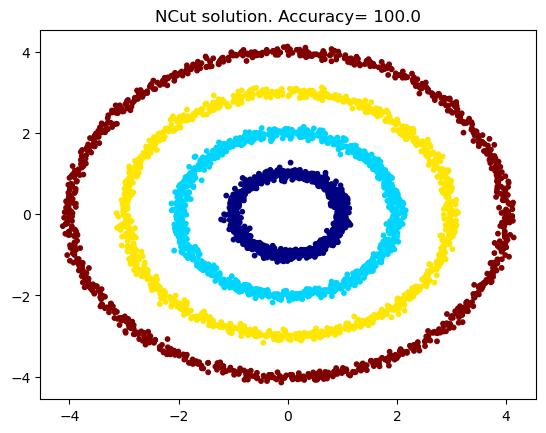

In [6]:
# Run NCut
k = 40
W = construct_knn_graph(X, k, 'euclidean_zelnik_perona')
C_ncut, acc = compute_ncut(W, Cgt, nc)

# Plot
plt.figure(4)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_ncut, color=pyplot.jet())
plt.title('NCut solution. Accuracy= ' + 
          str(compute_purity(C_ncut,Cgt,nc)) )
plt.show()
